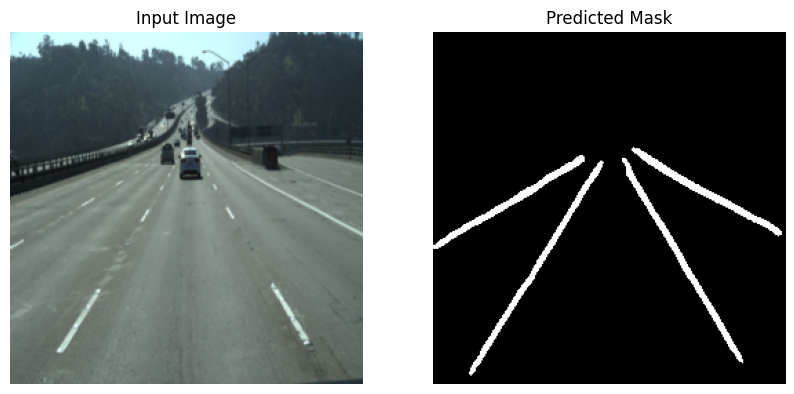

In [2]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp

# Eğitilmiş modeli yükle
checkpoint = torch.load("best_model.pth")
model = smp.Unet(encoder_name="resnet34", encoder_weights=None, classes=2)
model.load_state_dict(checkpoint)
model.eval()

# Giriş fotoğrafını yükle
input_image_path = "tusimple_preprocessed2/training/frames/0313-1_1860.jpg"
input_image = Image.open(input_image_path).convert("RGB")

# Giriş fotoğrafını modele uygun şekle dönüştür
input_transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
input_image = input_transform(input_image).unsqueeze(0)

# Modeli kullanarak maskeleme işlemi yap
with torch.inference_mode():
    output_mask_logits = model(input_image)
    output_mask_probs = torch.softmax(output_mask_logits, dim=1)
    predicted_mask = output_mask_probs.argmax(dim=1).cpu().numpy()[0]

# Görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(np.array(input_image.squeeze(0).permute(1, 2, 0)))
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(predicted_mask, cmap="gray")
ax[1].set_title("Predicted Mask")
ax[1].axis("off")

plt.show()
